### Q1-1

Load the DICOM file `xray-chest.dcm`, and:

* print the kVp and mAs settings.

* print the source-to-detector distance in **cm**.

* print the exposure index.

* print the spatial resolution / pixel spacing, in **mm**.

In [30]:
import numpy as np
import pydicom
# add your code below

f = 'C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/xray-chest.dcm'
dcm = pydicom.dcmread(f)
#print(dcm)
print(f"kVp: {dcm.KVP}")
print(f"mAs: {dcm.Exposure}")
print(f"source-to-detector distance in cm: {float(dcm.DistanceSourceToDetector)/10}")
print(f"Exposure Index : {float(dcm.ExposureIndex)}")
pixelspacing = [float(x) for x in dcm.PixelSpacing]
print(f"{pixelspacing[0] * float(dcm.Rows):.2f} mm x {pixelspacing[1] * float(dcm.Columns):.2f}mm")
#print(float(dcm.SpatialResolution))


kVp: 110
mAs: 2
source-to-detector distance in cm: 180.0
Exposure Index : 193.12
421.45 mm x 350.28mm


In [31]:
print(dcm)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 188
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.840.113564.172245035.2017020212140726562.1003000225002
(0002,0010) Transfer Syntax UID                 UI: RLE Lossless
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-2.0'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008,0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008,0018) SOP Instance UID                    UI: 1.2.840.113564.172245035.2017020212140726562.1003000225002
(0008,0020) Study Dat

### Q1-2

Get the chest x-ray image from the dicom metadata, and:

* display the image using Matplotlib, in **grayscale**.

* **invert** the image display intensities, such that the bones are dark and the lungs are white.

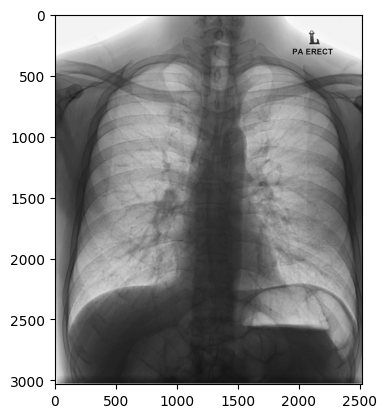

In [32]:
import matplotlib.pyplot as plt
# add your code below

img = dcm.pixel_array
img_inverted = np.max(img) - img
plt.imshow(img_inverted, cmap = "gray")

#plt.axis('off')

### Q1-3

Blank out the "L - PA ERECT" marker in the image, so that it looks something like this:   
*(NOTE: you'll probably need to use array indexing to modify the image matrix)*

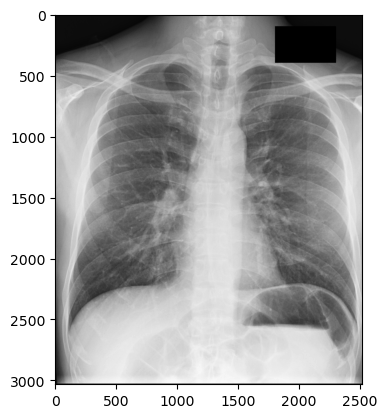

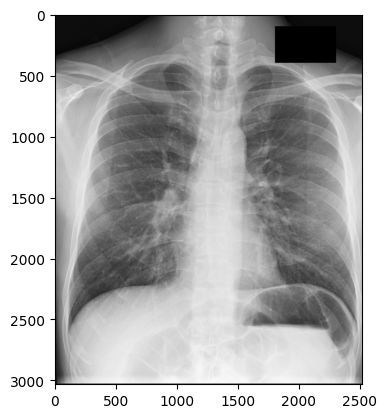

In [33]:
# add your code below
y1, y2 = 100, 400
x1, x2 = 1800,2300
img_copy = img.copy()
img_copy[y1:y2, x1:x2] = 0
plt.imshow(img_copy, cmap = "gray")

### Q2-1

Load the NIfTI file `mri-heart.nii.gz`, and:

* print the image shape / volume matrix size.

* print the *x,y,z* resolution / pixel spacings in mm.

In [34]:
import nibabel as nib
# add your code below
nii = nib.load('C:/Users/HP/OneDrive/Documents/Study/AI/data-20250404T030049Z-001/data/mri-heart/mri-heart.nii')
data = nii.get_fdata()
pixdim = nii.header['pixdim']
print(data.shape)
print(f"Pixel spacings (mm) : {float(pixdim[1])} x {float(pixdim[2])}, {float(pixdim[3]):.2f} ")

(320, 320, 110)
Pixel spacings (mm) : 1.25 x 1.25, 1.37 


In [35]:
print(nii)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (320, 320, 110)
affine:
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 320 320 110   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'5.0.10')
aux_file        :

### Q2-2

Display the relevant image slice in grayscale, based on the `n_z` variable.   
I.e., if `n_z = 50`, then display axial slice index 50 (the image at *z* index 50).

(np.float64(-0.5), np.float64(319.5), np.float64(319.5), np.float64(-0.5))

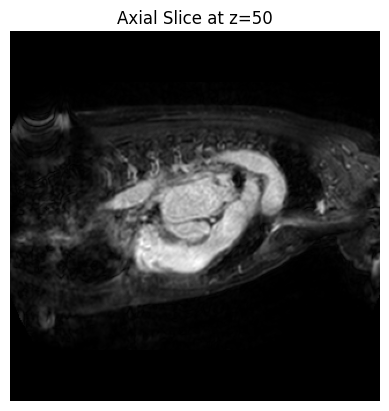

In [39]:
n_z = 50
# add your code below
slice_data = data[:, :, n_z]  

plt.imshow(slice_data, cmap='gray')
plt.title(f'Axial Slice at z={n_z}')
plt.axis('off')


### Q2-3

Given the `n_x`, `n_y`, and `n_z` variables below, try to create a multiplanar view of the volume from all three planes. I.e., try to reproduce the following image as closely as possible:   
*(NOTE: since the volume is almost isotropic, you don't have to adjust the aspect ratio here)*

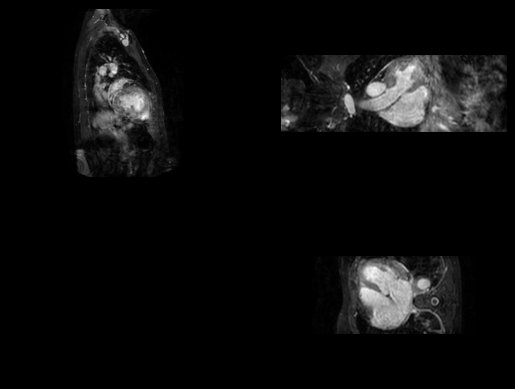

(np.float64(-0.5), np.float64(319.5), np.float64(109.5), np.float64(-0.5))

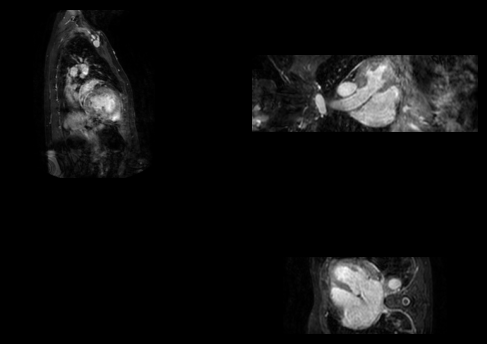

In [55]:
n_x, n_y, n_z = 175, 144, 31
# add your code below
sagittal = np.rot90(data[n_x, :, :], k = 3)
coronal = np.rot90(data[:, n_y, :], k = 3)
axial = np.rot90(data[:,:,n_z])

fig = plt.figure(facecolor='black')

#up left
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.imshow(axial, cmap = "gray")
ax1.axis('off')

#up right
ax2 = plt.subplot2grid((2,2), (0,1))
ax2.imshow(sagittal, cmap = "gray")
ax2.axis('off')

#below right 
ax3 = plt.subplot2grid((2,2), (1,1))
ax3.imshow(coronal, cmap = "gray")
ax3.axis('off')